In [1]:

import numpy as np
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def smooth(scalars, weight: float)-> list:  # Weight between 0 and 1
    """
    exponential moving average
    Tensorboard-like smoothing
    """
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [ ]:
def removeOutliers(x, outlierConstant=1.5) -> list:
    arr = np.asarray(x)
    upper_quartile = np.percentile(arr, 75)
    lower_quartile = np.percentile(arr, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)

    result = arr[np.where((arr >= quartileSet[0]) & (arr <= quartileSet[1]))]

    return result.tolist()

In [3]:
# env_id = "HalfCheetah-v2"
env_id = "Hopper-v3"

agent_df = pd.read_csv(f'{env_id}/{env_id}_results.csv')
expert_df = pd.read_csv(f'{env_id}/{env_id}_expert.csv')

In [4]:
agent_df.head()
t_agent = agent_df["global_step"]
t_expert = expert_df["global_step"]

In [5]:
t_agent.shape, t_expert.shape

((231,), (399,))

In [6]:

agent_rews = np.array(agent_df["Grouped runs - return/test/ep_rew_mean"]).copy()
expert_rews = np.array(expert_df["Grouped runs - return/test/ep_rew_mean"]).copy()
                        # HalfCheetah-v2/sac/seed0-20210722-0035 - return/test/ep_rew_mean"]

In [7]:
smoothed_expert_rews = np.asarray(smooth(expert_rews, weight=0.6)).reshape(-1, 1)
smoothed_agent_rews = np.asarray(smooth(agent_rews, weight=0.6)).reshape(-1, 1)

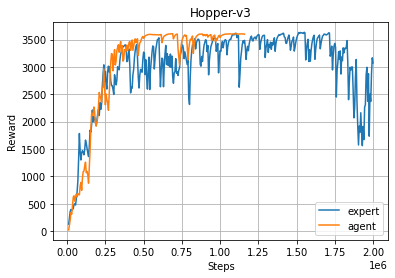

In [8]:

plt.plot(t_expert, smoothed_expert_rews, label='expert')
plt.plot(t_agent, smoothed_agent_rews, label='agent')
plt.title(env_id)
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(smoothed_expert_rews)
print(scaler.data_min_, scaler.data_max_)
expert_scale = scaler.transform(smoothed_expert_rews)
agent_scale = scaler.transform(smoothed_agent_rews)


[124.74371529] [3633.35024673]


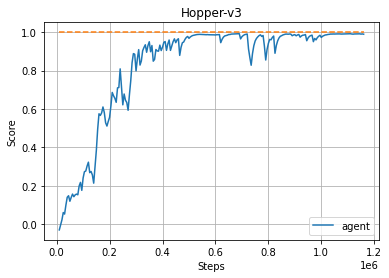

In [16]:

# plt.plot(t_expert, expert_scale, label='expert')
plt.plot(t_agent, agent_scale, label='agent')
plt.plot(t_agent, np.ones_like(t_agent, dtype=np.int8), '--')
plt.title(env_id)
plt.xlabel('Steps')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()